# Using the CRISP-DM Method for MLN 601 Machine Learning
#Assessment 2: Classification Analysis







Adapted from Smart Vision Europe (2020)https://www.sv-europe.com/crisp-dm-methodology/ and Patience (2018) https://grantpatience.com/2018/10/30/applying-crisp-dm-to-data-science-and-a-re-usable-template-in-jupyter/

CRISP-DM is a process used to guide data mining and machine learning projects. It breaks down the work into six main steps to help data teams solve problems in an organized way.

First, there's the Business Understanding phase. This is where the team figures out what the company or organization needs and how data can help. It's about setting clear goals based on business priorities.

Next is Data Understanding, where the team collects the data they need and starts exploring it. They check the data for problems and try to spot any patterns or insights early on.

In the Data Preparation phase, the team gets the data ready for analysis. They clean it up, fix any mistakes, and choose the parts that are most useful for the project.

Then comes Modeling. This is where the team applies different algorithms or techniques to the data to create models that can predict outcomes or find patterns. They might try several methods to see which works best.

Once the models are built, the team moves to Evaluation. Here, they check how well the models perform and make sure they meet the goals set in the first phase. If the models don’t work as expected, they might need to go back and make adjustments.

Finally, in Deployment, the results are put into action. This could mean creating reports, making business decisions, or integrating the model into a company's systems.

# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor"></a>
This stage focuses on understanding the project's goals from a business perspective. It involves identifying the main problem or question the business wants to solve and defining the data mining objectives that align with those goals. The team works closely with stakeholders to clarify what the business needs and translates those needs into a clear plan for the data analysis. The goal is to ensure that the project stays focused on delivering value to the business.

## 1.1 Assess the Current Situation<a class="anchor"></a>

The data represents the quality of it's data, which is red wine. There are 1599 entries in the data with 12 different variables which are as follows
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
12 - quality (score between 0 and 10)

In the context of a winery, it is important to ensure that the quality of wine is as high as possible, to ensure a satisified and returning customer base. Through this data, patterns can be recognized to ensure which variables play a significant part in ensuring the quality of the wine and how these variables together can ensure a satisfactory product.

# 2. Stage  Two - Data Understanding <a class="anchor"></a>
In this phase, the user gathers and explores the data they will use for the project. They examine the data to understand its structure, patterns, and quality, checking for any issues like missing or inconsistent values. The goal is to gain insights into the data and assess whether it’s suitable for the project, while also identifying any initial patterns that might help in the later stages of modeling and analysis.

## 2.1 Initial Data Acquisition <a class="anchor"></a>
The data being used was acquied from the dataset called "Red Wine Quality" https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009. The original link assigned in the assessment brief downloaded the CSV file incorrectly, and after multiple tries, I had to use Kaggle. The dataset is the same and from the same source, however. The CSV file was then exported to my Google Drive, as I am using Google Colab to write this code.

In [168]:
# Import Libraries Required

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

from warnings import filterwarnings
filterwarnings(action='ignore')

In [169]:
#Data source:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
#Source Query location:
wine = pd.read_csv("/content/drive/My Drive/dataset/winequality-red.csv")

## 2.2 Describe Data <a class="anchor"></a>
Once the data was mounted, I displayed the number of rows and columns in the dataset, examined a randomized sample of 10 along with the information of all variables. I found that none of the variables had a null value, making my data complete and the cleaning part simpler. I also asked for information such as the count, mean, standard deviation, minimum, and maximum amount of each variable. The number of instances assigned to each quality number associated was also displayed along with more information on the quality.

In [171]:
# Number of rows & columns in the dataset
wine.shape

(1599, 12)

In [172]:
# random sample of 10
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
980,9.1,0.50,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,6
681,8.0,0.45,0.23,2.2,0.094,16.0,29.0,0.99620,3.21,0.49,10.2,6
632,7.6,0.41,0.14,3.0,0.087,21.0,43.0,0.99640,3.32,0.57,10.5,6
1028,7.2,0.34,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1,6
242,7.7,0.58,0.10,1.8,0.102,28.0,109.0,0.99565,3.08,0.49,9.8,6
444,5.3,0.57,0.01,1.7,0.054,5.0,27.0,0.99340,3.57,0.84,12.5,7
159,6.8,0.60,0.18,1.9,0.079,18.0,86.0,0.99680,3.59,0.57,9.3,6
1574,5.6,0.31,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
688,7.7,0.66,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5
147,7.6,0.49,0.26,1.6,0.236,10.0,88.0,0.99680,3.11,0.80,9.3,5


In [173]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [174]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [175]:
wine.quality.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [176]:
wine['quality'].describe()

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


## 2.3 Verify Data Quality <a class="anchor"></a>

### 2.3.1. Outliers <a class="anchor"></a>
As mentioned earlier, there were no outliers or null values in this dataset. I checked again and the display results were the same.

In [177]:
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## 2.4 Initial Data Exploration  <a class="anchor"></a>
The histogram of each variable was viewed. The mean values of each available quality number was also displayed, showing some relationship between quality and volatile acidity, citric acid, pH, sulphates, and alcohol. The mean of all the variables was displayed, which already provided some patterns between the independent variables and the quality of the wine. The number of instances assigned to each quality number associated was also displayed in a bar chart.

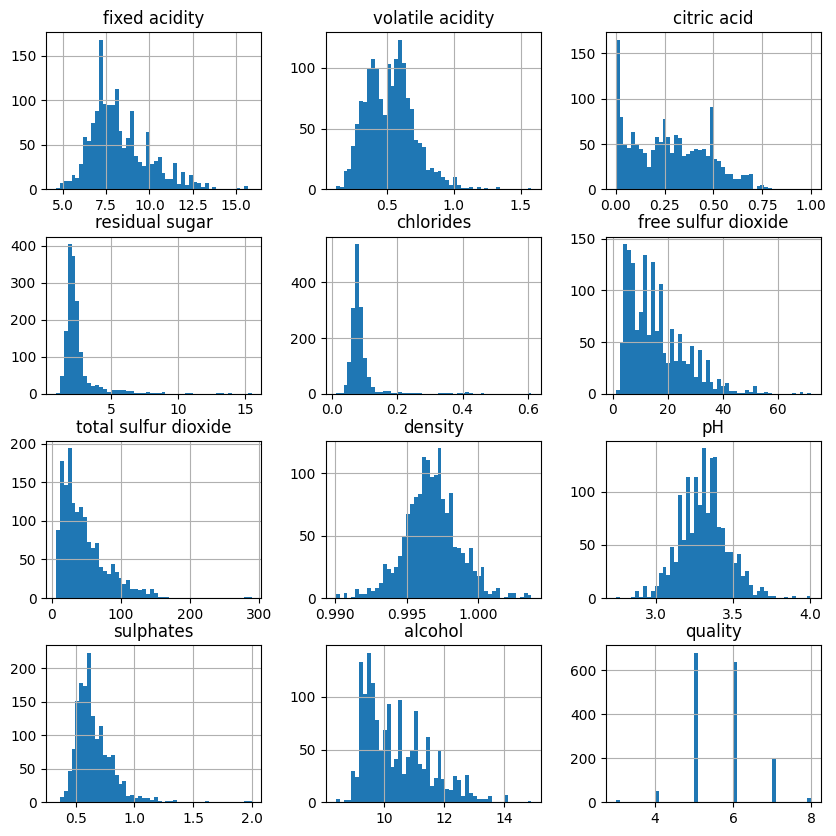

In [178]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

In [179]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


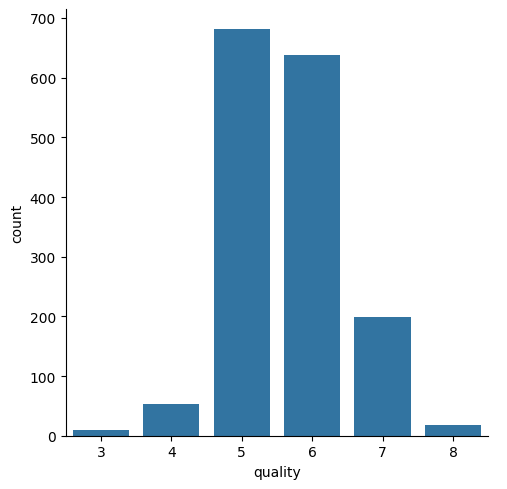

In [180]:
# number of values for each quality
sns.catplot(x='quality', data = wine, kind = 'count')

### 2.4.2 Correlations  <a class="anchor"></a>
The relationship/dependency quality has with variables such as volatile acidity, citric acid, sulphates, and alcohol was added on a bar plot for each to determine a visual pattern. I added a heatmap that shows a more cohesive visualization of the correlation between each variable with each other.

<Axes: xlabel='quality', ylabel='volatile acidity'>

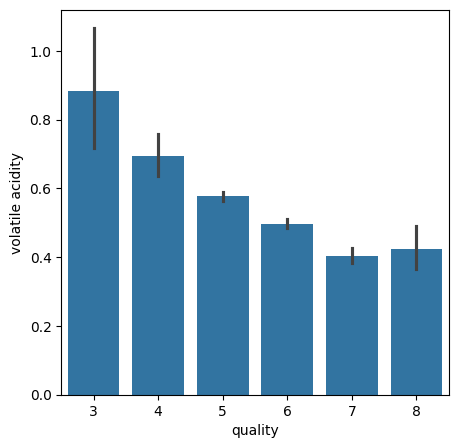

In [181]:
# Volatile Acidity and Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

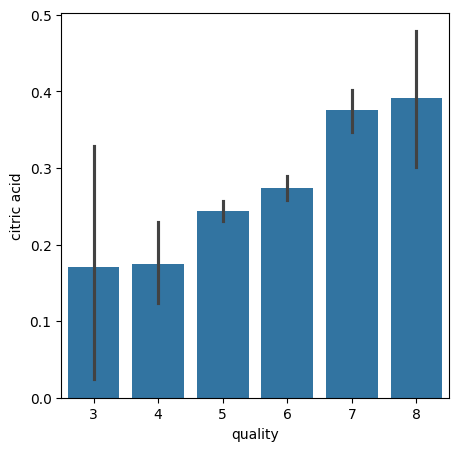

In [182]:
# Citric Acid and Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

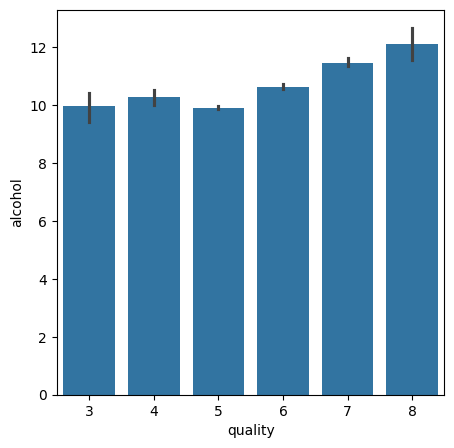

In [183]:
# Alcohol and Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = wine)

<Axes: xlabel='quality', ylabel='sulphates'>

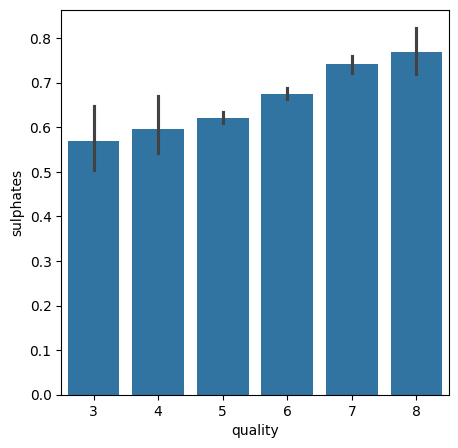

In [184]:
# Sulphates and Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'sulphates', data = wine)

<Axes: >

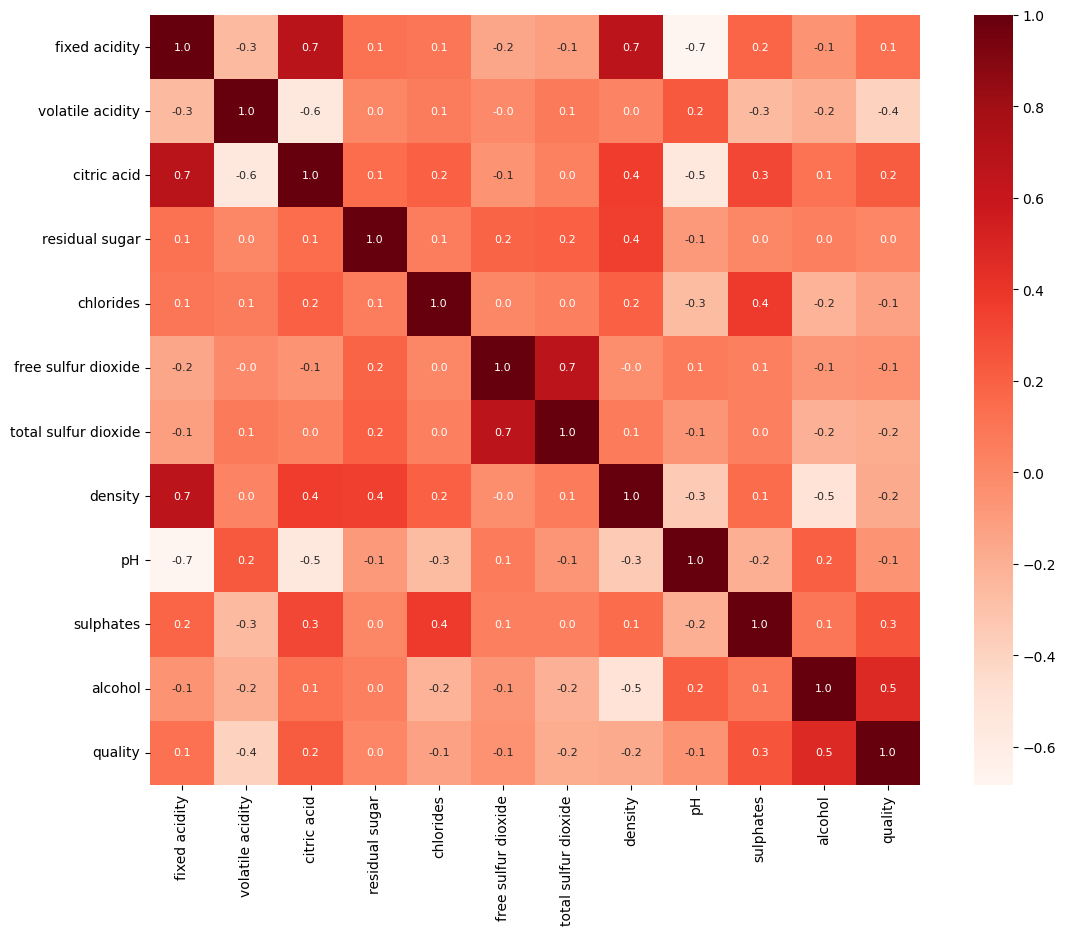

In [185]:
# constructing a heatmap to understand the correlation between the columns
correlation = wine.corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Reds')

# 3. Stage Three - Data Preparation <a class="anchor"></a>


## 3.1 Select Your Data <a class="anchor"></a>
The quality instances that existed in the dataset were singled out, which were 3, 4, 5, 6, 7, 8. The numbers 0, 1, 2, 9, and 10 were not in the dataset, thus they were omitted.

In [186]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

## 3.2 Clean The Data <a class="anchor"></a>
An assumption was made in the dataset source that any quality rating that was equal to or more than 6 were considered good. There was a binary rating to whether the quality of a wine was good or bad. Any wine with a rating of 6 and more was of good quality, therefore being a 0, anything under 6 was not of good quality, therefore being 1.

In [187]:
# If wine quality is 6 or above then will consider as good quality wine
Y = wine['quality'].apply(lambda y_value: 0 if y_value>=6 else 1)

# 4. Stage Four - Modelling <a class="anchor"></a>
As the data preprocessing step showed that there were multiple variables that had a pattern in terms of quality, I decided to use Random Forest Classifier as my model. I dropped the variable "quality" as it would be the independent value.


In [188]:
# separate the data and Label
X = wine.drop('quality',axis=1)

In [189]:
# Shows values of the independent variables
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [190]:
# Shows values of the dependent variable, which is quality in the binary of 0s and 1s, meaning good quality or bad quality respectively

print(Y)

0       1
1       1
2       1
3       0
4       1
       ..
1594    1
1595    0
1596    0
1597    1
1598    0
Name: quality, Length: 1599, dtype: int64


## 4.1. Modelling technique <a class="anchor"></a>
The train_test_split technique was used, where I used the basic ratio of 80% for training the data and 20% for testing the data.

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [192]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


## 4.2. Modelling assumptions <a class="anchor"></a>
As there are no null values, there won't be any missing variables. The null quality ratings that weren't in the dataset were also omitted earlier.

## 4.3. Build Model <a class="anchor"></a>
I ran the Random Forest Classifier model.

In [193]:
# Running the RandomForestClassifier
model = RandomForestClassifier()

## 4.4. Assess Model <a class="anchor"></a>

In [194]:
#Train the data by using the fit function which fits the datapoints to the RandomForestClassifier
model.fit(X_train, Y_train)

RandomForestClassifier()

# 5. Stage 5 - Evaluate  <a class="anchor"></a>
The accuracy of the model was tested to see how efficient it is. A score of over 84% was achieved, making the model very efficient.

In [195]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [196]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.840625


# 6. Stage 6 - Deploy  <a class="anchor"></a>

As this assessment did not require proper deployment, it was interesting to test out different types of classification methodologies. My initial plan was to use the Decision Tree model but with multiple tries and restarting the project to no avail, I tried different models. The Random Forest Classifier was the one that worked for me without any issue. As the assessment allowed any type of logistic classification model, I was lucky to be able to use one. I also failed to apply AUC-ROC for accuracy, and after many tries, it ended up making my code not work, so I opted out of it. Overall, as a beginner to Machine Learning and coding in general, I was fairly satisfied with my outcome, albeit a bit disappointed in the roadblocks and incomplete tasks.
